In [1]:
library(maptools)
library(mapdata)
library(maps)
library('ggmap')
library(ggplot2)


Warning message:
"package 'maptools' was built under R version 3.4.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.3"Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Warning message:
"package 'mapdata' was built under R version 3.4.3"Loading required package: maps
Warning message:
"package 'ggmap' was built under R version 3.4.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

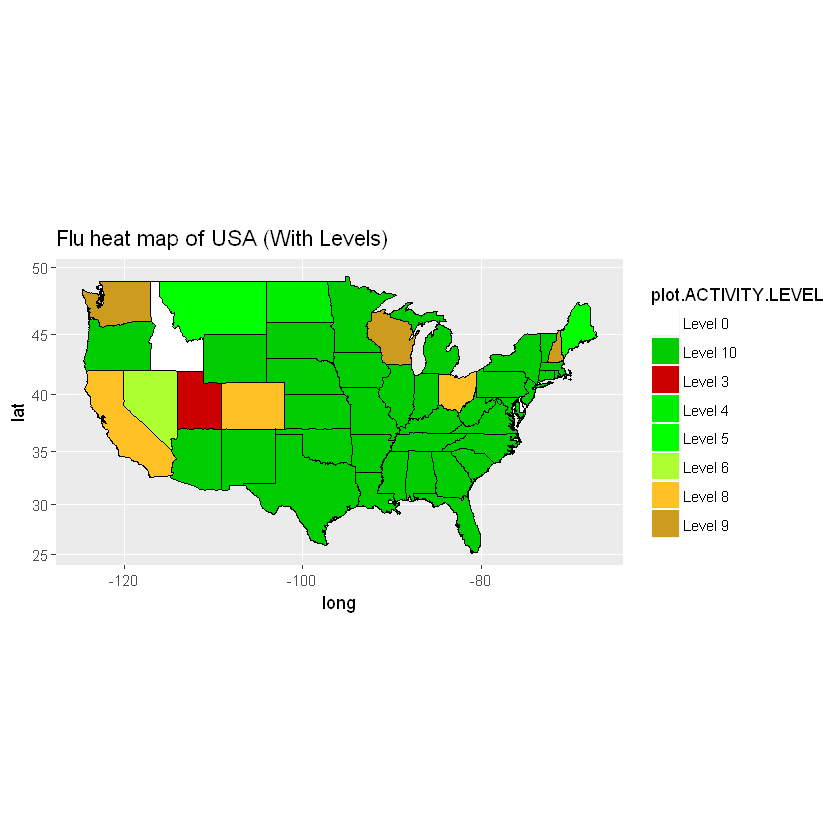

In [10]:
path <- "StateDatabyWeekforMap_2017-18week4-4.csv"
plot <- read.csv(file=path,sep=",")
plot <- data.frame(plot$STATENAME,plot$ACTIVITY.LEVEL,plot$Level)
plot$region <- tolower(plot$plot.STATENAME)
states <- map_data("state")
map.df <- merge(states,plot, by="region", all.plot=T)
map.df <- map.df[order(map.df$order),]

ggplot(map.df, aes(x=long,y=lat,group=group))+ ggtitle("Flu heat map of USA (With Levels)")+
     geom_polygon(aes(fill=plot.ACTIVITY.LEVEL))+
     geom_path()+ 
     scale_fill_manual(values = c('white', 'green3','red3','green2','green1',
                                  'greenyellow','goldenrod1',
                                  'goldenrod3', 'darkorange3','red1','red2'))+
     coord_map()

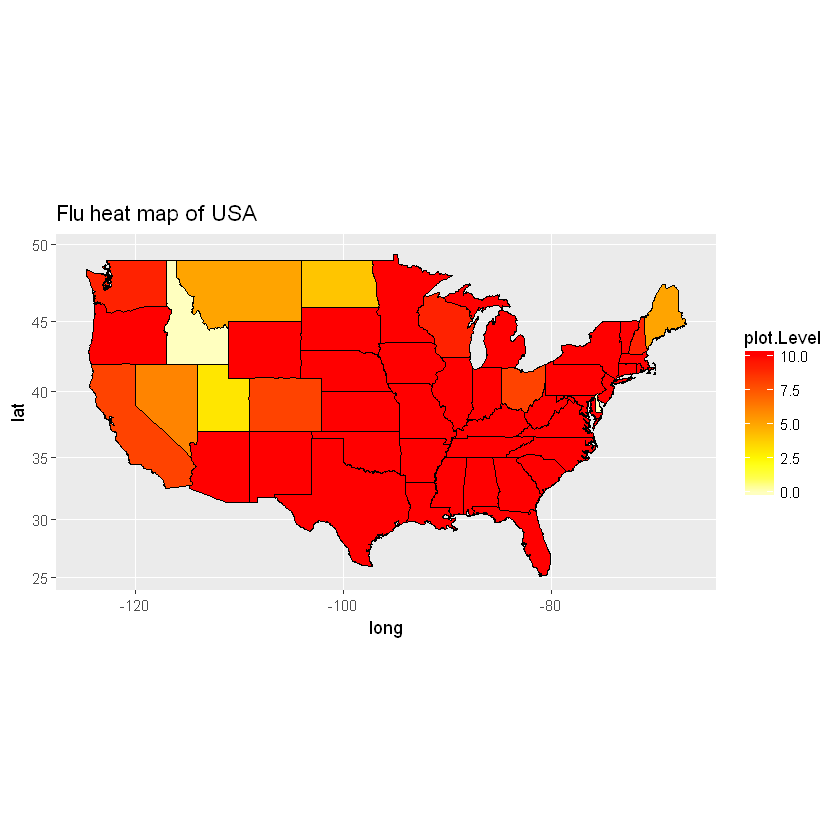

In [8]:
ggplot(map.df, aes(x=long,y=lat,group=group))+ ggtitle("Flu heat map of USA ")+
     geom_polygon(aes(fill=plot.Level))+
     geom_path()+ 
     scale_fill_gradientn(colours=rev(heat.colors(10)),na.value="grey90")+
     coord_map()